In [3]:
import gym
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Categorical

#Hyperparameters
learning_rate = 0.0002
gamma         = 0.98

class Policy(nn.Module):
    def __init__(self):
        super(Policy, self).__init__()
        self.data = []
        
        self.fc1 = nn.Linear(4, 128)
        self.fc2 = nn.Linear(128, 2)
        self.optimizer = optim.Adam(self.parameters(), lr=learning_rate)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.softmax(self.fc2(x), dim=0)
        return x
      
    def put_data(self, item):
        self.data.append(item)
        
    def train_net(self):
        R = 0
        self.optimizer.zero_grad()
        for r, prob in self.data[::-1]:
            R = r + gamma * R
            loss = -torch.log(prob) * R
            loss.backward()
        self.optimizer.step()
        self.data = []

def main():
    env = gym.make('CartPole-v1')
    pi = Policy()
    score = 0.0
    print_interval = 20
    
    
    for n_epi in range(10000):
        s = env.reset()
        done = False
        
        while not done: # CartPole-v1 forced to terminates at 500 step.
            prob = pi(torch.tensor(s, dtype = torch.float))
            m = Categorical(prob)
            a = m.sample()
            s_prime, r, done, info = env.step(a.item())
            pi.put_data((r,prob[a]))
            s = s_prime
            score += r
            
        pi.train_net()
        
        if n_epi%print_interval==0 and n_epi!=0:
            print("# of episode :{}, avg score : {}".format(n_epi, score/print_interval))
            score = 0.0
    env.close()
    
if __name__ == '__main__':
    main()

/tmp/ipykernel_22633/4082112623.py:51: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1659484806139/work/torch/csrc/utils/tensor_new.cpp:201.)
  prob = pi(torch.tensor(s, dtype = torch.float))


ValueError: expected sequence of length 4 at dim 1 (got 0)

In [1]:
import gym
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from collections import deque
import random
import matplotlib.pyplot as plt

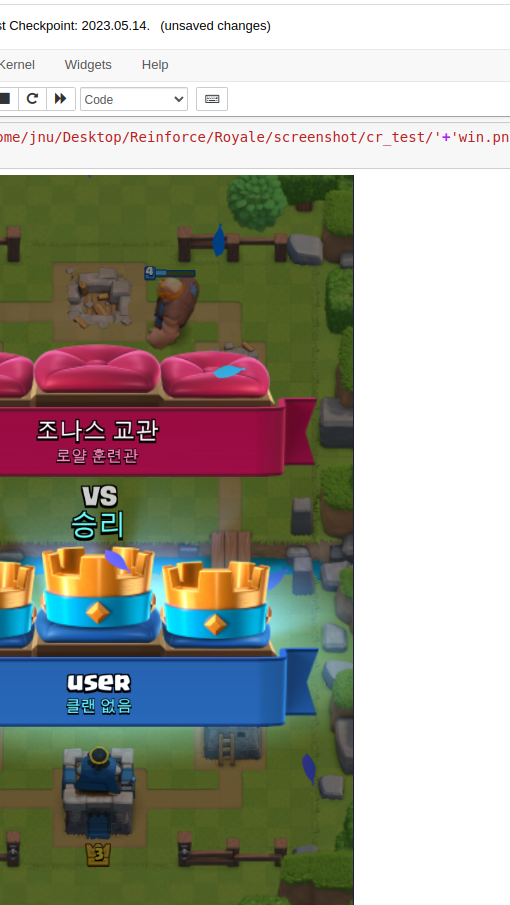

In [2]:
import pyautogui as pag
import time

pag.screenshot('/home/jnu/Desktop/Reinforce/Royale/screenshot/cr_test/'+ time.strftime('%Y-%m-%d_%H-%M-%S', time.localtime(time.time())) + '.png', region=(2605, 100, 510, 905))
#3115 1005

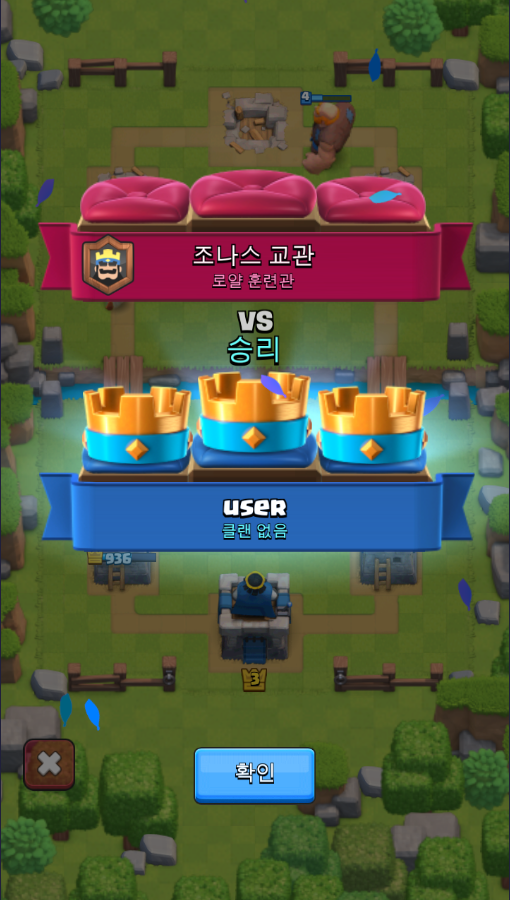

In [44]:
pag.screenshot('/home/jnu/Desktop/Reinforce/Royale/screenshot/cr_test/'+'win.png', region=(2605, 100, 510, 900))


In [14]:
#pag.moveTo(3115, 1005)
for i in range(18):
    pag.moveTo(2660+i*23.823, 200)
    time.sleep(0.1)

In [19]:
for i in range(30):
    pag.moveTo(2660+23.823, 200+19.61*i)
    time.sleep(0.1)

In [20]:
for i in range(18):
    for j in range(30):
        pag.moveTo(2660+i*23.823, 200+19.61*j)
        time.sleep(0.1)

In [38]:
action_list = []
for i in range(18):
    for j in range(30):
        #pag.moveTo(2660+i*23.823, 200+19.61*j)
        if(i == 15 or i == 16):
            if(j == 5 or j == 6):
                pass
            else:
                continue
        action_list.append((2660+i*23.823, 200+19.61*j))
        
action_list.append((2765, 900))
action_list.append((2855, 900))
action_list.append((2950, 900))
action_list.append((3055, 900))

In [39]:
action_list
print(len(action_list))

488


In [60]:
class DQN(nn.Module):
    def __init__(self, n_action):
        super(DQN, self).__init__()
        self.n_action = n_action
        
        self.conv1 = nn.Conv2d(4, 32, kernel_size=8, stride=4, padding=0)  # (In Channel, Out Channel, ...)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=4, stride=2, padding=0)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=0)
        
        self.affine1 = nn.Linear(3136, 512)
        self.affine2 = nn.Linear(512, self.n_action)
        
    def forward(self, x):
        h = F.relu(self.conv1(x))
        h = F.relu(self.conv2(h))
        h = F.relu(self.conv3(h))

        # print(h.size())
        # print(h.view(h.size(0), -1).size())

        h = F.relu(self.affine1(h.view(h.size(0), -1)))
        h = self.affine2(h)
        return h

In [35]:
import PIL
import torchvision.transforms as transforms

img = PIL.Image.open('/home/jnu/Desktop/Reinforce/Royale/screenshot/cr_test/play_screen.png')

tf = transforms.ToTensor()
img_t = tf(img)

print(img_t.size())
print(type(img_t))
print(img_t)

torch.Size([3, 875, 490])
<class 'torch.Tensor'>
tensor([[[0.6353, 0.5647, 0.5373,  ..., 0.1216, 0.1020, 0.1137],
         [0.7451, 0.7098, 0.6314,  ..., 0.1765, 0.1373, 0.1412],
         [0.7961, 0.7843, 0.7294,  ..., 0.1686, 0.1373, 0.1373],
         ...,
         [0.4784, 0.5490, 0.4314,  ..., 0.0000, 0.0000, 0.0000],
         [0.4392, 0.4667, 0.4275,  ..., 0.0000, 0.0000, 0.0000],
         [0.4196, 0.4431, 0.4510,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.5490, 0.5804, 0.6353,  ..., 0.1922, 0.1725, 0.1922],
         [0.6667, 0.6667, 0.6549,  ..., 0.2627, 0.2353, 0.2431],
         [0.7255, 0.7176, 0.6941,  ..., 0.2549, 0.2353, 0.2431],
         ...,
         [0.6706, 0.7020, 0.5686,  ..., 0.2000, 0.2000, 0.2000],
         [0.6588, 0.6549, 0.6431,  ..., 0.1961, 0.1961, 0.2000],
         [0.6627, 0.6745, 0.7020,  ..., 0.1922, 0.1922, 0.1961]],

        [[0.4667, 0.3647, 0.2980,  ..., 0.0667, 0.0549, 0.0667],
         [0.6196, 0.5686, 0.4549,  ..., 0.0941, 0.0667, 0.0784],
         

In [6]:
from torchvision.transforms.functional import to_pil_image
plt.imshow(to_pil_image(img_t))

NameError: name 'plt' is not defined

In [94]:
print(img_t)

tensor([[[0.6353, 0.5647, 0.5373,  ..., 0.1216, 0.1020, 0.1137],
         [0.7451, 0.7098, 0.6314,  ..., 0.1765, 0.1373, 0.1412],
         [0.7961, 0.7843, 0.7294,  ..., 0.1686, 0.1373, 0.1373],
         ...,
         [0.4784, 0.5490, 0.4314,  ..., 0.0000, 0.0000, 0.0000],
         [0.4392, 0.4667, 0.4275,  ..., 0.0000, 0.0000, 0.0000],
         [0.4196, 0.4431, 0.4510,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.5490, 0.5804, 0.6353,  ..., 0.1922, 0.1725, 0.1922],
         [0.6667, 0.6667, 0.6549,  ..., 0.2627, 0.2353, 0.2431],
         [0.7255, 0.7176, 0.6941,  ..., 0.2549, 0.2353, 0.2431],
         ...,
         [0.6706, 0.7020, 0.5686,  ..., 0.2000, 0.2000, 0.2000],
         [0.6588, 0.6549, 0.6431,  ..., 0.1961, 0.1961, 0.2000],
         [0.6627, 0.6745, 0.7020,  ..., 0.1922, 0.1922, 0.1961]],

        [[0.4667, 0.3647, 0.2980,  ..., 0.0667, 0.0549, 0.0667],
         [0.6196, 0.5686, 0.4549,  ..., 0.0941, 0.0667, 0.0784],
         [0.6863, 0.6745, 0.6039,  ..., 0.0902, 0.0706, 0.

In [95]:
model = DQN(288)

In [61]:
out = model(img_t)

RuntimeError: Given groups=1, weight of size [32, 4, 8, 8], expected input[1, 3, 875, 490] to have 4 channels, but got 3 channels instead

In [24]:
img = PIL.Image.open('/home/jnu/Desktop/Reinforce/Royale/screenshot/cr_test/play_screen.png')

tf = transforms.ToTensor()
img_t = tf(img)

In [25]:
class DQN_test(nn.Module):
    def __init__(self, n_action):
        super(DQN_test, self).__init__()
        self.conv1 = nn.Sequential(nn.Conv2d(3, 16, kernel_size=3, padding=1, stride=2),
                                nn.BatchNorm2d(16),
                                nn.ReLU(inplace=True))
        self.conv2 = nn.Sequential(nn.Conv2d(16, 64, kernel_size=3, padding=1, stride=2),
                                nn.BatchNorm2d(64),
                                nn.ReLU(inplace=True))
        self.conv3 = nn.Sequential(nn.Conv2d(64, 256, kernel_size=3, padding=1, stride=2),
                                nn.BatchNorm2d(256),
                                nn.ReLU(inplace=True))
  , 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1.,      self.conv4 = nn.Sequential(nn.Conv2d(256, 512, kernel_size=3, padding=1, stride=2),
                                nn.BatchNorm2d(512),
                                nn.ReLU(inplace=True))
        self.actor_linear = nn.Sequential(nn.Linear(872960, 256),
                                          nn.ReLU(inplace=True),
                                          nn.Linear(256,n_action))
        
    def forward(self, x): #각 action에 대한 가치출력
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.actor_linear(x.reshape(x.size(0), -1))
        return x

In [26]:
model = DQN_test(488)

In [27]:
img_t = img_t.unsqueeze(0)

In [28]:
img_t.shape

torch.Size([1, 3, 875, 490])

In [29]:
out = model(img_t)

In [30]:
out.shape

torch.Size([1, 488])

In [31]:
out1 = out.reshape(out.size(0), -1)
print(out1)

tensor([[-1.5195e-01,  7.6984e-02, -1.0278e-01,  3.8343e-03,  8.4237e-02,
         -1.4577e-01,  1.9539e-01,  2.3704e-01, -5.5259e-03,  6.9120e-02,
         -1.3945e-01, -7.7228e-02, -9.4905e-02,  1.1581e-01, -4.7943e-01,
         -5.1100e-02, -7.6639e-02,  1.7706e-01,  9.2531e-02, -5.3653e-02,
          7.6166e-02,  1.5610e-01,  3.4151e-02,  2.9803e-02, -1.7643e-01,
         -1.2738e-02, -8.3234e-02,  5.1808e-02,  7.5498e-02, -1.1364e-01,
         -6.8980e-02,  3.0256e-01,  2.2996e-02,  6.1687e-02,  4.8268e-02,
          6.8480e-02, -2.1868e-01, -6.2886e-03, -1.5189e-01,  9.3498e-02,
         -2.1972e-01,  1.6848e-01,  2.0362e-01, -2.4953e-01,  7.9535e-02,
          2.9136e-02,  1.3622e-01, -1.3889e-01,  3.4194e-02, -1.3212e-03,
         -6.7555e-02, -1.1229e-01, -1.1724e-01,  1.3291e-01, -3.3675e-01,
         -1.3514e-02, -1.1774e-02,  2.2536e-02, -1.8509e-01, -2.7387e-02,
          9.8083e-02, -1.5596e-01,  1.7176e-02, -1.2838e-01, -1.0691e-01,
         -5.8099e-02, -1.5581e-01,  9.

In [32]:
print(out1.shape)

torch.Size([1, 488])


In [176]:
print(out)

tensor([[[[0.0393, 0.0000, 0.0000,  ..., 2.0490, 2.0782, 2.0016],
          [0.0000, 0.0000, 0.0000,  ..., 1.8133, 1.8336, 1.9123],
          [0.0000, 0.0000, 0.0000,  ..., 1.7395, 1.8004, 1.8647],
          ...,
          [0.0000, 1.5909, 0.7635,  ..., 0.7595, 0.9533, 0.9086],
          [0.0000, 1.6499, 1.1443,  ..., 0.7611, 0.9493, 0.9057],
          [0.0000, 0.0000, 0.4423,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.4936, 0.3785, 0.8335,  ..., 2.6717, 2.6619, 2.7403],
          [0.0000, 0.0000, 0.0000,  ..., 2.3775, 2.3484, 2.5552],
          [0.0000, 0.0000, 0.0000,  ..., 2.1453, 2.2644, 2.3964],
          ...,
          [0.0000, 1.1494, 1.0229,  ..., 1.0360, 1.4668, 1.4344],
          [0.0000, 1.1363, 1.0238,  ..., 1.0529, 1.4843, 1.4446],
          [0.9637, 2.6938, 3.1945,  ..., 2.7942, 2.9960, 2.8889]],

         [[1.3715, 0.9424, 1.6872,  ..., 0.0000, 0.0000, 0.0000],
          [2.5120, 0.8455, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [2.6055, 1.8447, 0.8669,  ..., 0

In [163]:
print(out.shape)
print(type(out))
print(out)

torch.Size([1, 488])
<class 'torch.Tensor'>
tensor([[-2.3915e-01, -4.1004e-02,  1.5628e-01,  2.8946e-01,  2.2961e-01,
         -5.6303e-03, -7.4880e-02, -6.3635e-02, -2.4267e-01,  8.1608e-02,
          1.3088e-01, -2.6715e-02,  2.8291e-01,  8.9859e-02, -5.6954e-02,
          2.6730e-01,  4.2221e-02, -2.6706e-01,  1.6996e-01, -1.7208e-01,
          2.5021e-01,  1.1656e-01,  2.1160e-01,  1.2173e-01, -2.1457e-01,
          1.1101e-01,  1.5624e-01, -7.7318e-02,  2.2807e-01,  7.9276e-02,
         -2.8667e-02, -3.7236e-01,  2.6490e-02,  3.2400e-02, -6.1019e-02,
         -2.1958e-01,  1.6312e-01, -1.8557e-01,  1.8843e-01, -1.8100e-01,
         -2.3379e-01, -1.8643e-01,  1.6282e-02,  2.1300e-03, -1.6676e-02,
         -2.6429e-01, -5.5847e-02,  1.4842e-01, -1.6998e-01, -2.5274e-01,
          1.1429e-01,  2.0462e-02,  2.9200e-01,  1.2777e-01,  2.0094e-02,
          2.2274e-01, -2.9825e-01, -3.1218e-02,  7.7850e-02,  2.5463e-01,
         -5.4995e-02,  9.2601e-02, -2.7516e-01,  1.2146e-01,  8.0065

In [33]:
print(out.argmax())
print(out.max())
print(torch.sum(out))

tensor(413)
tensor(0.5069, grad_fn=<MaxBackward1>)
tensor(3.0478, grad_fn=<SumBackward0>)


In [154]:
from torchvision.transforms.functional import to_pil_image
plt.imshow(to_pil_image(out_t))

ValueError: pic should not have > 4 channels. Got 16 channels.